# Lab 12: Regression

*For the class on Wednesday, March 13th*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

## A. Linear Regression with Feature Transformation

In this example, we can observe that a simple linear regression does not work very well. 
The reason is that the target value actually depends on some nonlinear functions of the features. 

*Note that we know this only because the data set was generated with known ground truths. In a real-world problem we would not even know this.*

Our goal here is to identify proper feature transformation to make the linear regression works better. 

### A1. Simple Linear Regression

In [40]:
df = pd.read_csv("https://yymao.github.io/phys7730/data/lab12a.csv")
df.head()

,feature1,feature2,target
0,183.498163,0.491170,73.575095
1,159.655403,-5.744078,68.959186
2,128.886324,1.616083,68.938267
3,104.295157,0.510549,59.968115
4,197.365440,-4.106682,74.827323


In [41]:
train_features, test_features, train_target, test_target = train_test_split(df[["feature1", "feature2"]], df["target"], test_size=0.25, random_state=123)

In [42]:
reg = LinearRegression()
reg.fit(train_features, train_target)
train_predict = reg.predict(train_features)
test_predict = reg.predict(test_features)
print(reg.coef_, reg.intercept_)

[0.17798778 3.70521238] 45.25839570233251


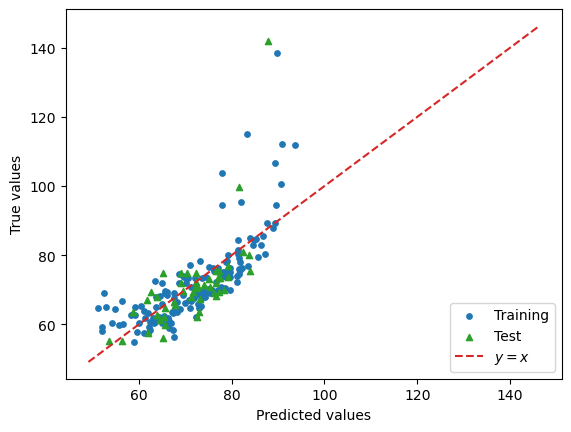

In [43]:
plt.scatter(train_predict, train_target, c="C0", s=15, label="Training")
plt.scatter(test_predict, test_target, c="C2", s=20, marker="^", label="Test")

# this complicated line is just for getting the values of the lower left and upper right corners of the plot
corners = np.diag(np.quantile(np.stack([plt.gca().get_xlim(), plt.gca().get_ylim()]), [0, 1], axis=0))
plt.plot(corners, corners, c="C3", ls="--", label="$y=x$")

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc="lower right");

**Question for A1**: Discuss the plot above. How would you evaluate the performace of the model? In what ways does it fail? 

--- 
*// Write your answer here*


---

### A2. Feature Transformation

In order to come up with some ideas to transform the features, we need to explore the data set a bit more and observe the trends. 
Here are the steps:

1. Similar to Lab 11, make some plots to explore the data set. 
2. After you have those plots, propose some possible feature transformations. 
3. Repeat the linear regession but with transformed features. 

In [44]:
# Add your implementation to explore the given data set here.


In [45]:
# Implement the feature transformations here.

train_features_transformed = np.stack([train_features["feature1"], train_features["feature2"]]).T
test_features_transformed = np.stack([test_features["feature1"], test_features["feature2"]]).T

In [46]:
# Repeat the linear regession process here.


**Questions for A2**: 

1. Does the feature transformation you applied help with the linear regession? How would you evaluate the result with feature transformation? 
2. If you have much more features such that it becomes difficult to visually inspect their relationships,
   how would you come up with feature transformation in this case? 

--- 
*// Write your answer here*


---

## B. Logistic Regression

In this example, we use logistic regression on a classification problem. 
The target has either a value of 0 or 1. 

This problem can be thought as a regression problem where we imagine there is a probability
that decides whether the target is 0 or 1, and that probability depends on the features.

### B1. With L2 penalty as regularization (default option)

*No code edits/changes needed in Part B1.*

In [48]:
df = pd.read_csv("https://yymao.github.io/phys7730/data/lab12b.csv")
df.head()

,feature1,feature2,feature3,target
0,0.823837,0.002049,0.255416,1
1,0.463884,0.048156,0.134220,0
2,0.891357,0.884391,0.167048,1
3,0.564873,0.580101,0.203385,1
4,0.993192,-0.412869,0.957949,0


In [49]:
train_features, test_features, train_target, test_target = train_test_split(df.iloc[:,:3], df["target"], test_size=0.25, random_state=123)

In [65]:
reg = LogisticRegression()
reg.fit(train_features, train_target)
train_predict = reg.predict_proba(train_features)
test_predict = reg.predict_proba(test_features)
print(reg.coef_, reg.intercept_)

[[ 4.32390719  0.20046014 -4.42811441]] [-2.39770848]


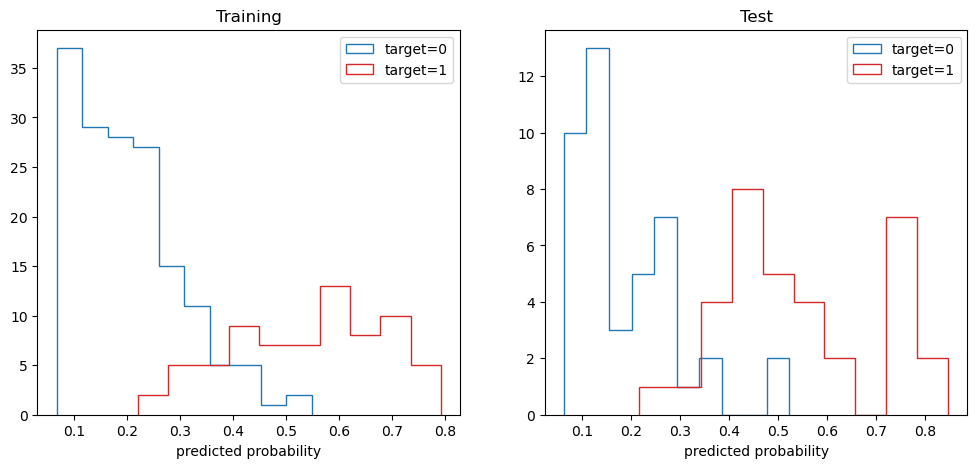

In [66]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

ax[0].hist(train_predict[train_target==0,1], histtype="step", color="C0", label="target=0")
ax[0].hist(train_predict[train_target==1,1], histtype="step", color="C3", label="target=1")
ax[0].set_title("Training")
ax[0].set_xlabel("predicted probability")
ax[0].legend()

ax[1].hist(test_predict[test_target==0,1], histtype="step", color="C0", label="target=0")
ax[1].hist(test_predict[test_target==1,1], histtype="step", color="C3", label="target=1")
ax[1].set_title("Test")
ax[1].set_xlabel("predicted probability")
ax[1].legend();

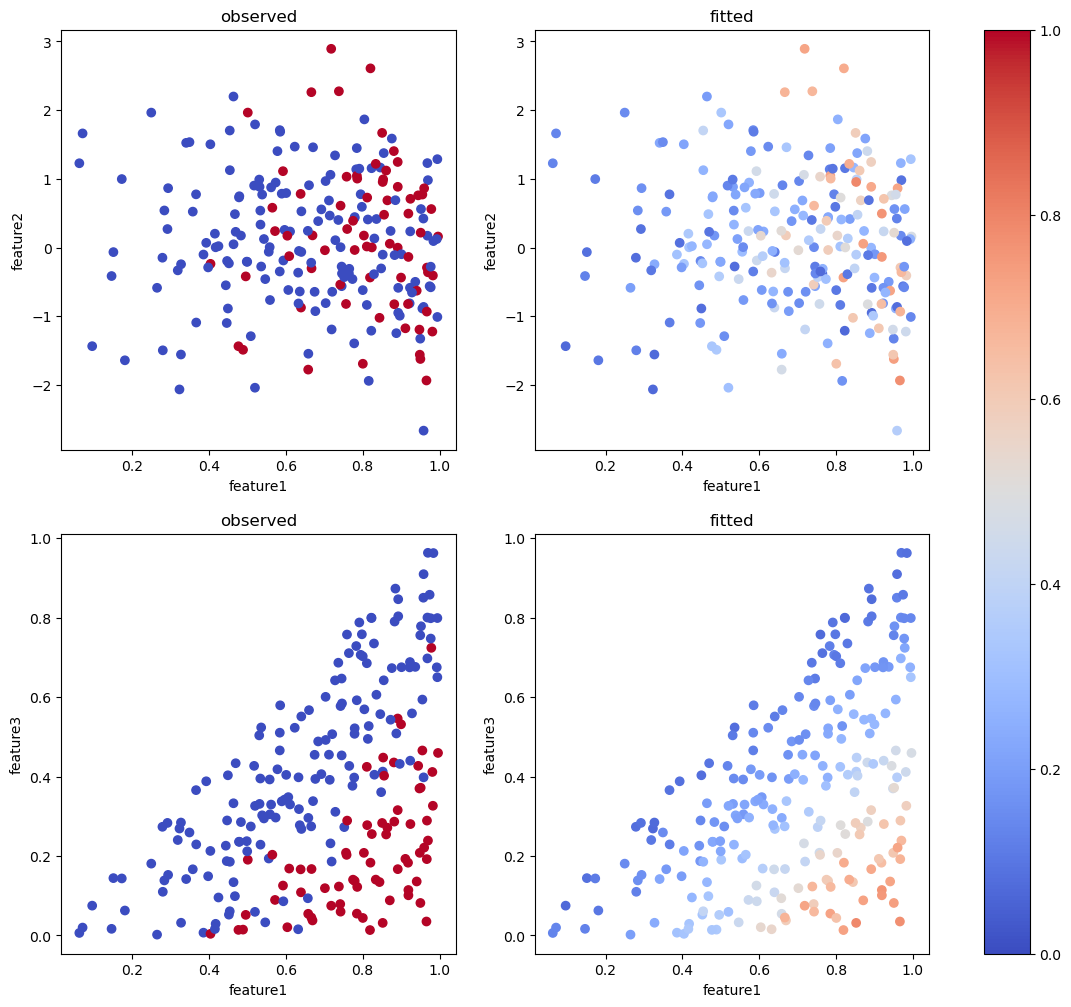

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

cs = ax[0,0].scatter(train_features["feature1"], train_features["feature2"], c=train_target, vmin=0, vmax=1, cmap="coolwarm")
cs = ax[0,1].scatter(train_features["feature1"], train_features["feature2"], c=train_predict[:,1], vmin=0, vmax=1, cmap="coolwarm")
ax[0,0].set_xlabel("feature1")
ax[0,1].set_xlabel("feature1")
ax[0,0].set_ylabel("feature2")
ax[0,1].set_ylabel("feature2")
ax[0,0].set_title("observed")
ax[0,1].set_title("fitted")

cs = ax[1,0].scatter(train_features["feature1"], train_features["feature3"], c=train_target, vmin=0, vmax=1, cmap="coolwarm")
cs = ax[1,1].scatter(train_features["feature1"], train_features["feature3"], c=train_predict[:,1], vmin=0, vmax=1, cmap="coolwarm")
ax[1,0].set_xlabel("feature1")
ax[1,1].set_xlabel("feature1")
ax[1,0].set_ylabel("feature3")
ax[1,1].set_ylabel("feature3")
ax[1,0].set_title("observed")
ax[1,1].set_title("fitted")

plt.colorbar(cs, ax=ax);

**Questions for Part B1**: 

1. Briefly explain what these plots are showing. 
2. Based on these plots, do you think the model gives a good fit to the data set? 

--- 
*// Write your answer here*


---

## B2. With no regularization

Repeat B1 but update the line `reg = LogisticRegression()` with `reg = LogisticRegression(penalty=None)` 
(you may want to copy those cells below rather than directly editing above, so that you can compare the plots between B1 and B2.)

In [ ]:
#

**Question for Part B2**: Compare the results between B1 and B2. Which case gives you a better fit? Does you answer agree your intuition? Explain briefly.

--- 
*// Write your answer here*


---

:::{tip}
**How to submit this notebook on Canvas?**

1. Make sure all your answers, code, and desired results are properly displayed in the notebook.
2. Save the notebook (press `Ctrl`+`s` or `Cmd`+`s`). The grey dot on the filename tab (indicating "unsaved") should disappear. 
3. Run the following cell.
4. Upload the resulting HTML file to Canvas under the corresponding assignment. 
:::

In [ ]:
! jupyter nbconvert --to html ./12.ipynb